<h1 style="text-align: center;"> TP 4: Classification d'images</h1>

<h5 style="text-align: center;"> Auteur: BARGO Alfred</h5>

<h5 style="text-align: center;"> Enseignant: Dr Poulmanogo ILLY
</h5>

## Introduction

La vision par ordinateur joue un rôle central dans de nombreuses applications du deep learning. Parmi les approches utilisées, la plus efficace dans la classification d'images est l'utilisation des réseaux de neurones convolutif (CNN). 
 
Dans ce projet, nous utilisons le jeu de données CIFAR-10 comme cadre expérimental afin d'entraîner un CNN avec pour objectif principal de maximiser le taux de classification des images.

## I. Description du jeu de données 

Le jeu de données **CIFAR-10**(**C**anadian **I**nstitute **F**or **A**dvanced **R**esearch) est une collection d'images largement utilisée pour les algorithmes d'apprentissage automatique et de vision par ordinateur.
 
En réalité, sous-ensemble étiqueté manuellement d'une base de données beaucoup plus vaste appelée **80 million tiny images** collectée en 2008 par des chercheurs de l'institut [CIFAR](https://cifar.ca/fr/) (Alex Krizhevsky, Vinod Nair et Geoffrey Hinton), le jeu de données *CIFAR* se compose de [60 000 images couleur de 32 x 32 pixels réparties en 10 classes différentes](https://www.kaggle.com/c/cifar-10/). 

## II. Préparation du dataset

### II.1 Chargement des bibliothèques nécessaire, des données et visualisation

* **Chargement des bibliothèques**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import joblib
import tensorflow as tf
import numpy as np, random
from datetime import datetime
import warnings

In [2]:
# Ignorer les avertissements
warnings.filterwarnings("ignore")

* **📥 Chargement des données**

In [3]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

* **🖼 Visualisation**

**Affichage des dimensions**

In [10]:
# Affichage des dimensions
print("Données d'entraînement")
print("X_train---->",X_train.shape) 
print("X_train---->",y_train.shape)
print("")
print("Données de test")
print("X_test---->",X_test.shape)
print("y_test---->",y_test.shape)

Données d'entraînement
X_train----> (50000, 32, 32, 3)
X_train----> (50000, 1)

Données de test
X_test----> (10000, 32, 32, 3)
y_test----> (10000, 1)


**Interprétation :**

Les images sont sous le format 32 x 32 pixels et en couleur (RGB). De plus, l'ensemble test est constitué de 10 000 images et l'ensemble d'entraînement quant à lui est constitué de 50 000 images.

**Aperçu des valeurs de quelques instances**

In [11]:
# Valeurs des pixels
print(X_train[0])
print("")
print("Valeur minimal ----->",X_train[0].min())
print("Valeur maximale ---->",X_train[0].max())

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

Valeur minimal -----> 0
Valeur maximale ----> 255


**Interprétation :**

Les valeurs des pixels varient entre 0 et 255. Il faut donc les normaliser par la suite

In [12]:
# Aperçu des valeurs de la variable cible
print(y_train)

print("")
print("====== classes ======")
print(np.unique(y_train))

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

====== classes ======
[0 1 2 3 4 5 6 7 8 9]


**Interprétation :**

Les valeurs de la variable cible sont des entiers dont chacun représente un label spécifique de 0 à 9. En effet, ces labels ont été encodés car ils sont sont à l'origine des chaines de caratères (car, automobile, bird, etc)

* **Affichage de quelques images**

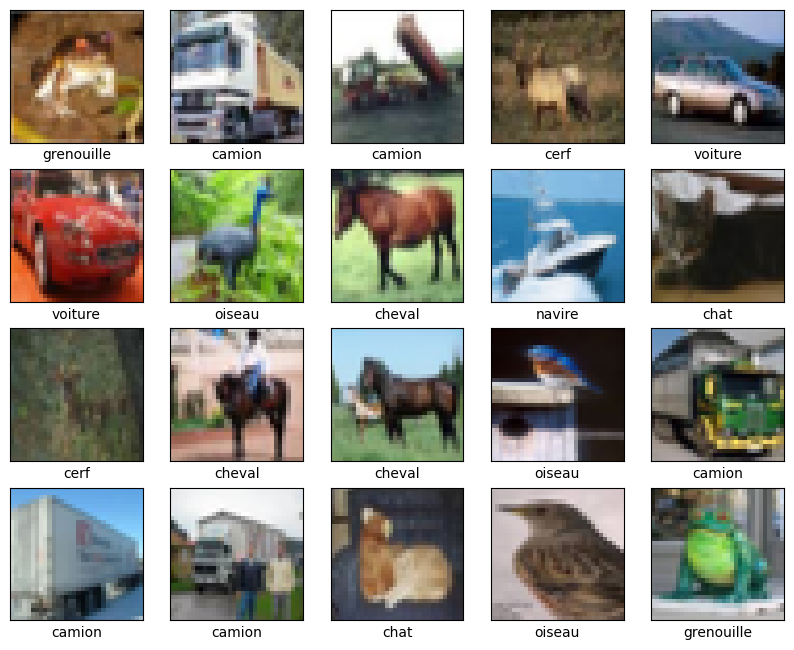

In [15]:
# Attribution de noms aux différentes classes
class_names=['avion','voiture','oiseau','chat','cerf','chien','grenouille',
             'cheval','navire','camion']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)          # Afficher en couleur
    plt.imshow(X_train[i])   # Affichage des images
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

* **Distribution des classes dans l'ensemble d'entraînement**

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
print("\nDistribution des classes dans l'ensemble d'entraînement:")
for val, count in zip(unique, counts):
    print(f"Classe {val}: {count} échantillons ({count/len(y_train)*100:.2f}%)")


Distribution des classes dans l'ensemble d'entraînement:
Classe 0: 5000 échantillons (10.00%)
Classe 1: 5000 échantillons (10.00%)
Classe 2: 5000 échantillons (10.00%)
Classe 3: 5000 échantillons (10.00%)
Classe 4: 5000 échantillons (10.00%)
Classe 5: 5000 échantillons (10.00%)
Classe 6: 5000 échantillons (10.00%)
Classe 7: 5000 échantillons (10.00%)
Classe 8: 5000 échantillons (10.00%)
Classe 9: 5000 échantillons (10.00%)


**Interprétation :**

Les classes sont proportionnellement distribuées 

### II.2 Prétraitement des données

* **Normalisation des données** 

Il est nécessaire de normaliser les valeurs des pixels et de les mettre dans une échelle de valeurs comprises entre 0 et 1 avant l'entraînement.

In [4]:
Xmax=X_train.max()
X_train=X_train/Xmax
X_test=X_test/Xmax

# Affichage des bornes de valeur après normalisation
print("Après normalisation:Min={}, Max={}".format({X_train.min()},{X_train.max()})) 

Après normalisation:Min={0.0}, Max={1.0}


* **Remarque :**

Comme la variable cible a été déjà encodé, donc il n'est plus necessaire de chercher à encodé encore la variable.

Nous passons alors à la définition et l'entraînement du modèle.

## III. Définition, entraînement et  evaluation du modèle

### III.1 Définition du modèle

In [5]:
def build_model():
    
    # Création d'une structure de CNN 
    model_cnn=models.Sequential([
        # Couche de convolution 1
        layers.Conv2D(132,(3,3), strides=1, padding="same",input_shape=(32,32,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
            
        # Couche de convolution: 2
        layers.Conv2D(80,(3,3), strides=1, padding="same",activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
            
        # Couche de convolution: 3
        layers.Conv2D(50,(3,3), strides=1, padding="same",activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
            
        # Applatissement
        layers.Flatten(),
            
        # Couche complètement connecté: 1
        layers.Dense(132, activation='relu'),
        layers.Dropout(0.4),
        
        # Couche compltètement connecté: 2
        layers.Dense(10, activation='softmax')
    ])

    return model_cnn
          

**Interprétation :** 

Nous avons défini trois couches de convolution avec du same padding et après chaque couche de convolution, nous réalisons une opération de MaxPooling et un dropout pour éviter que ce soit un groupe de neurones dans la couche qui apprennent plus que les autres.

Dans le MLP après aplatissement, nous avons défini une couche dense de 32 neurones appliquée à ReLU et une couche de sortie complètement connectée de dix neurones à laquelle nous appliquons l'activation *Softmax* puisqu'il s'agit d'une classification multiclasses.

* **🤖 Construction du modèle**

**Suppression des sessions antérieures et limitation de l'aspect aléatoire dans le choix des poids**

In [6]:
# Supprimer la dernière session d'entraînement 
tf.keras.backend.clear_session()

# Réduction de la variabilité
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Construction**

In [7]:
# Construction du modèle
model=build_model()

* **Résumé du modèle** 

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 132)         │           3,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 132)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 132)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 80)          │          95,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 50)            │          36,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 132)                 │         105,732 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 132)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,928 (945.03 KB)

 Trainable params: 241,928 (945.03 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # Pour la classification multiclasses
    metrics=['accuracy']
)

**Interprétation :**

Nous utilisons ici la métrique d'accuracy pour évaluer le modèle sur l'ensemble de validation. Cela est justifié par le fait que les classes ne sont pas déséquilibrées. De plus, la fonction de perte ici est *sparse_categorical_crossentropy* car les variables n'ont pas été encodées en One Hot, il sont déjà catégoriques. Cette version est plus rapide et plus économe en mémoire et adapté à la classification multiclasses. 

### III.2 Entraînement du modèle

In [10]:
history=model.fit(
    X_train, y_train,
    epochs=100,               # 50 époques d'entraînement 
    batch_size=50,           # 45 instances dans chaque batch
    validation_split=0.1,    # 10% du jeu de données pour la validation
    verbose=1                # Affichage des détails lors de l'entraînement 
)

Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 105s 112ms/step - accuracy: 0.3758 - loss: 1.7004 - val_accuracy: 0.4988 - val_loss: 1.3622
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.5162 - loss: 1.3407 - val_accuracy: 0.5898 - val_loss: 1.1611
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.5792 - loss: 1.1851 - val_accuracy: 0.6426 - val_loss: 1.0294
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 99s 109ms/step - accuracy: 0.6164 - loss: 1.0829 - val_accuracy: 0.6734 - val_loss: 0.9515
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 98s 108ms/step - accuracy: 0.6446 - loss: 1.0095 - val_accuracy: 0.7030 - val_loss: 0.8735
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.6611 - loss: 0.9592 - val_accuracy: 0.7106 - val_loss: 0.8386
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 99s 109ms/step - accuracy: 0.6761 - loss: 0.9252 - val_accuracy: 0.7274 - val_loss: 0.7967
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 97s 107ms/step - accuracy: 0.6853

### III.3 Evaluation du modèle

* **Courbes d'apprentissages**

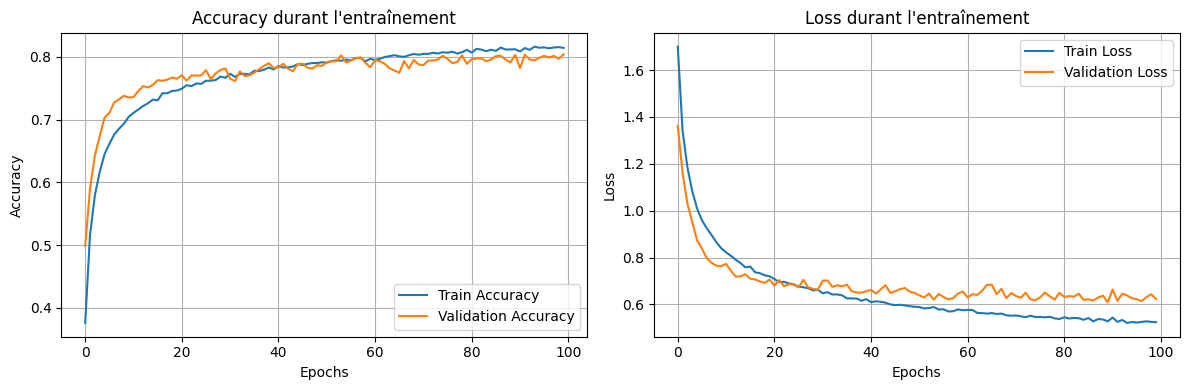

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Courbe d'accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy durant l\'entraînement')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Courbe de loss
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss durant l\'entraînement')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Analyse :**

Ces courbes permettent de statuer sur la capacité d'apprentissage et de généralisation du modèle. En effet, on remarque que l'accuracy dans le jeu d'entraînement et celui dans le jeu de validation croient tous, mais val_accuracy est légèrement supérieure. De même, les fonctions de coût dans le jeu d'entraînement et dans le jeu de validation croient avec celui dans le jeu de validation légèrement inférieure.

À partir d'un certain nombre d'époques (autour de la 25-ième époque), les courbes de la fonction coût dans les deux ensembles de données se croisent. De même pour les courbes de l'accuracy. Par la suite, l'accuracy dans l'ensemble de validation varient legèrement,tantôt une augmentation, tantôt une diminution mai cela reste faible pendant que celui de l'ensemble d'entraînement continue d'augmenter légèrement. Ce constat est fait aussi chez les courbes de la fonction coût où celle de l'ensemble d'entraînement continue d'augmenter légèrement pendant que celle de l'ensemble de validation diminue avec de légères variations. On note également que pendant tout l'entraînement, les courbes restent proches.

**Interprétation :** 

Le modèle apprend dans l'ensemble d'apprentissage et se généralise bien aussi dans l'ensemble de validation. Il n'y a donc pas de sur-apprentissage sévère ni de sous-apprentissage.

L'obtention de ce modèle a nécéssité plusieurs essais impliquant différentes combinaisons d'architectures et de paramètres. Bien vrai qu'il est théoriquement possible d'avoir un taux de classification atteignant 90 % sur le jeu de données CIFAR-10, cela requiert un réseau complexe et profond et donc une puissance de calcul importante et un temps assez conséquent. Une GridSearchCV est aussi moins adaptée, car on rencontre toujours les même contraintes de coût computationnel associées à l'entraînement répété. 
Ainsi, un accuracy avoisinant 81% constitue un compromis satisfaisant reflétant la capacité d'apprentissage et de généralisation raisonnable du modèle.

### III.4 Test du modèle sur les données de test 

* **Fonction de perte et métriques d'accuracy sur le jeu de données test** 

In [12]:
test_loss, test_accuracy=model.evaluate(X_test,y_test, verbose=1)
print(f"\n{'='*50}")
print(f"Résultats sur l'ensemble de test:")
print(f"{'='*50}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7911 - loss: 0.6302

Résultats sur l'ensemble de test:
Accuracy: 0.7911
Loss: 0.6302


**Interprétation :** 

Sur l'ensemble de test, le modèle donne une précision de 79,11% et une fonction de perte de 0.6302.

Bien que le modèle fait des erreurs de prédiction, on peut quand même dire que sa précision n'est pas aussi mauvaise.

* **Prédiction des classes et matrice de confusion**

In [13]:
# Prédiction
y_pred_proba = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

print("\nRapport de classification:")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step

Rapport de classification:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1000
           1       0.92      0.91      0.92      1000
           2       0.77      0.65      0.70      1000
           3       0.61      0.64      0.62      1000
           4       0.68      0.80      0.73      1000
           5       0.72      0.68      0.70      1000
           6       0.80      0.86      0.83      1000
           7       0.85      0.79      0.82      1000
           8       0.85      0.92      0.89      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



**Analyse :** 

Cet affichage permet de voir de près les différentes valeurs des métriques de précision dans chaque classe. Pour résumé, les précisions par classes varient entre 61 % et 92 %. le f1-score dans les classes qui est fonction de deux métriques (le Recall et la Précision) varie entre 62 %(pour la classe 3) et 92 %(pour la classe 1).

**Interprétation :** 

Les précisions dans les classes sont acceptables. Nous pouvons dire que pour des données dont le modèle n'avait jamais vu, il s'en sort bien. Toutefois, il ne serait pas mal d'avoir plus de précisions dans la prédiction du modèle.

* **Erreurs de prédiction sur le jeu de test**

Nombre total d'erreurs : 2089/10000
Taux d'erreur : 0.2089 (20.89 %)


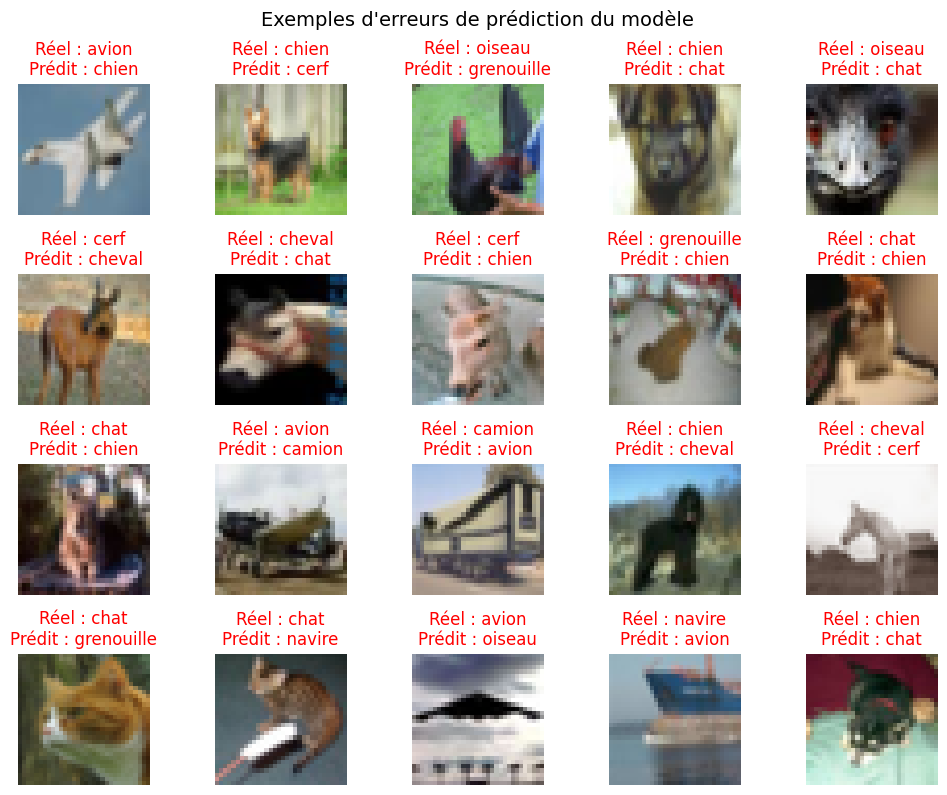

In [16]:
# Analyse des erreurs
errors = y_pred_classes.reshape(y_pred_classes.shape[0],1) != y_test
num_errors = np.sum(errors)
total_samples = len(y_test)
error_rate = num_errors / total_samples

print(f"Nombre total d'erreurs : {num_errors}/{total_samples}")
print(f"Taux d'erreur : {error_rate:.4f} ({error_rate*100:.2f} %)")

error_indices = np.where(errors)[0]

# Nombre d’images à afficher
n_display = 20
error_indices = error_indices[:n_display]

# =========================
# 4. Affichage des images mal classées
# =========================
plt.figure(figsize=(10, 10))

for i, idx in enumerate(error_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.axis("off")
    
    true_label = class_names[y_test[idx][0]]
    pred_label = class_names[y_pred_classes[idx]]
    
    plt.title(f"Réel : {true_label}\nPrédit : {pred_label}", color="red")

plt.suptitle("Exemples d'erreurs de prédiction du modèle", fontsize=14)
plt.tight_layout()
plt.show()

**Analyse :** 

Cet affichage permet de voir les erreurs de prédictions du modèle. En effet, le modèle a 20,89 % d'erreurs de prédictions sur les 10 000 images de test.

## IV. Sauvegarde du modèle

Nous sauvegardons le modèle crée avec la bibliothèque *joblib*. Cela permettra (si on le désir) de créer par la suite une interface utilisateur avec streamlit pour la classification d'images que l'utilisateur aura chargées.

In [17]:
# 7. Sauvegarde du modèle final
joblib.dump(model, 'model4/cifar_model.joblib')

# 8. Sauvegarde des métadonnées
metadata = {
    'input_shape': (32, 32, 3),
    'num_classes': 10,
    'class_names': ['avion','voiture','oiseau','chat','cerf','chien','grenouille',
             'cheval','navire','camion'],
    'test_accuracy': float(test_accuracy),
    'test_loss': float(test_loss),
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}
joblib.dump(metadata, 'model4/model_cifar_metadata.pkl')

['model4/model_cifar_metadata.pkl']

# Conclusion

En résumé, notre travail a consisté à la construction d'un modèle de réseau de neurones convolutif qui maximise au mieux le taux de prédiction. Cela s'est passé en plusieurs étapes. Nous avons commencé par le chargement des données, ensuite la définition de l'architecture et l'entraînement du modèle, l'évaluation et la modification des paramètres puis le test et enfin la sauvegarde. Ce TP au delà de l'implémentation du code, nous a permis de comprendre que l'amélioration des performances des modèles de deep learning repose souvent sur des architectures plus profonde et complexes, qui nécessite des ressources de calcul importantes.